<a href="https://colab.research.google.com/github/lalitbhattarai/Pytorch_Fundamentals/blob/main/Pytorch_Workflow_class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Pytorch Worlflow


lets explore a an example PyTorch end-to-end workflow


In [48]:
Covered_in_Pytorch_notrbook={ 1: "data (prepare and load)",
                              2:"bulid model",
                              3:"fitting the model to data(training)",
                              4:"making prediction and evalution a model (interfrence)",
                              5:"saving and loading a model",
6:"putting it all together"}
Covered_in_Pytorch_notrbook



{1: 'data (prepare and load)',
 2: 'bulid model',
 3: 'fitting the model to data(training)',
 4: 'making prediction and evalution a model (interfrence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [49]:
import torch
from torch import nn #nn cointains all of the Pytorch building blocks fro neural netwoerk
import matplotlib.pyplot as plt

#Check the version
torch.__version__


'2.5.1+cu124'

##Data (Preparing and Loading)

data can be almost anything ..in machine learning
* Excel spreadsheet
* Images of any kind
* Vedio (youtube has lots of datas..)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numeriacal representation

TO showcase this let's create some known data using the linear regression formula.

We'll use a lineaner regresion formula to make a straight line with *known*
**parameters**

In [50]:
#Create  *known* pareters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step) .unsqueeze(dim=1)
y=weight*X + bias
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [51]:
len(X),len(y)

(50, 50)

### Splitting Data into training and tests sets (one of the most importanceconcepts in general)
Let's create  atraining and test set with our data





In [52]:
#Craate atrain/test Split
train_split =int(0.8 * len(X))
X_train ,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)
print(type(X), type(y))


<class 'torch.Tensor'> <class 'torch.Tensor'>


How might we better visualize our data?

This is where the data explorer's motto comses in!

"Visualize","Visualizze","Visualize"

In [53]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in red (Fixed incorrect y-axis)
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    # Plot predictions if available
    if predictions is not None:

        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})


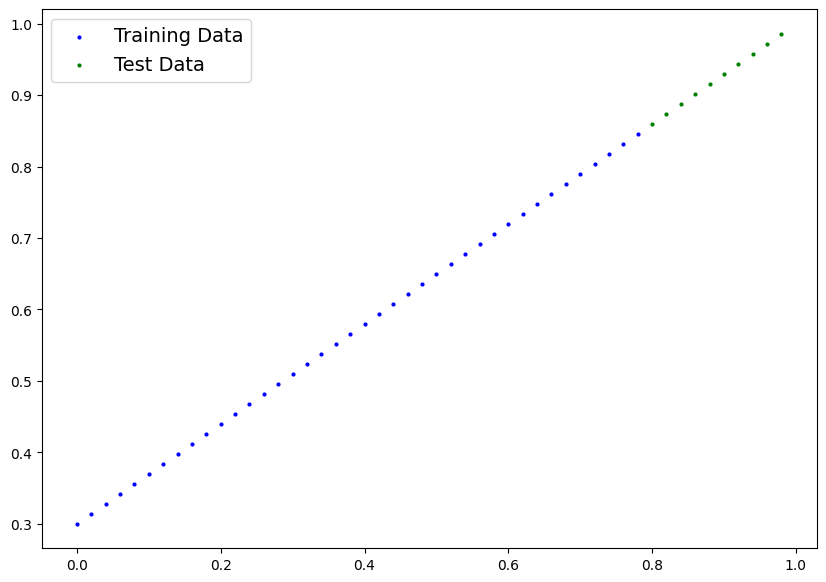

In [54]:
plot_predictions(X_train, y_train, X_test, y_test);

## 2. Bulid Model
Our first PyTorch model!
  
What does my model do?
* start with random values (weight and Bias
* Look at training data and adjust the random values to better
* look at training data and adjust the random values to better represent (or get closer to) the ideal vvalues (the weight and biasvalues we used to create the data )

How does it do so?(Algorithms)

1. Gradient decents
2. BackPropagation

In [55]:
#Create a linear regression model class
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):  #almost everything in pytorch is inheriate form nn
    def __init__(self):
        super().__init__()
        self.weight =nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))

        self.bias =nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))


        #FOrward ,ethod to define the computational in the model

    def forward(self,x:torch.tensor) ->torch.Tensor:  #x is input data here
            return self.weight * x + self.bias  #This is a linear regression formula




###Pytorch model building essentials

* torch.nn--contains all of the building for computational graphs (a neural network can be considered a computatona; graph)
* torch.nn.parameters--what parameter should our model try and learn,often a Pytorch layer from torch.nnwill set these for us
* torch.nn.Module--The base class for all neural network modules,if you subclass it,you should overwrite forward()
* torch.optim --This where the optimizer inpytorch live,they eill help eith gredient descend
* def forward()  --all nn.model subclass requires you to overwrite forward(),this method define what happens in the forward computation

### Checking the content of my pytorch model

We can check what is in our model by .peramater

In [56]:
#create a random seed
torch.manual_seed(42)
#create an instance of the model (this is a subclass of nn.module)
model_0 =LinearRegressionModel()

#Check out the paramenter
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [57]:
# List named parameter
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [58]:
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_model()
to check our model 's prediction power' , Lets see how well it predicts y_test based on X-test

When we pass data through our model ,It's going to run it through the forward() method

In [59]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [60]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [61]:
#make predictions with model

with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

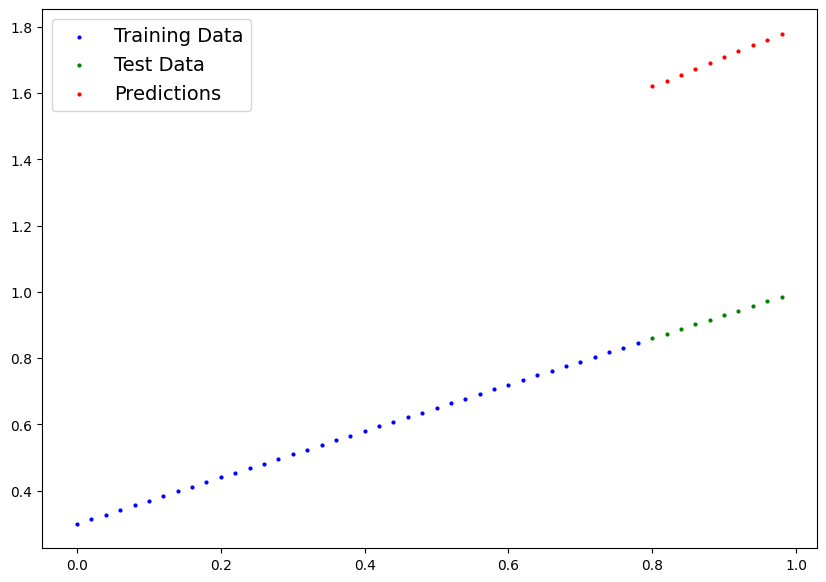

In [62]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)


## 3. Train model
  
   the whole idea of training model is to predict as much accurate as possible by moving the training datas

   One way to measure how poor your model prediction prediction are is to use a loss function

* Note :loss function may be called cost function or criteria in different areas.

* ** Loss function **:a function how wrong your mdoel's parameters are to the ideal outputs .lower is better
* ** Optimizer ** : Takes into account the loss of a model and adjust the model's parameters(eg.weight and bias)
    * inside the optimizer you often have to set two parameterss
    . params-the model paramater you'd like to optimize ,fro example params=model_0.parameters()

    . lr (learning rate) it show how big or how small the change is  

And specifically for pyTorch,We need:
* A training  loop
* A  testing loop



In [63]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [64]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [65]:
#setup the loss fFUnction
loss_fn=nn.L1Loss()

#setup an optimizer(stochastic gradient decend)

optimizer =torch.optim.SGD(model_0.parameters(),
                           lr=0.01
                           )   #lr=learning rate=possibly the most important hyperparameters you can set

* Q.whic loss function and optimizer shoild i use?

* A.This will be problrm specific .But with esperience You'll get an idea of what works and what doesnot work

For example for a regression problem (like ours) a loss function nn.L1Loss() and an optimixer like torch.optim.SGD() will suffice

classifying problem like a picture iis d og or a cat we'll use nn.BCELoss()

### Building a training loop in pyTorch

A couple of things we need in a training loop:
0. loop through the data
1. Forward pass(this invloves data moving through our model's `forward`() function ) to make prediction to the data also called forward propragation
2. calculate the loss(coampare forward pass prediction to ground truth lables)
3. optimizer zero grade
4. loss backward  -move backward through the network  to claculate the gradiennds of each of the parameters of our mdoell with respect to the loss ( ** backpropragation ** )
5. ptimizer step--use the optimizer to adjust our model's parameters to try and improve the loss ( ** graident decend ** )

In [66]:
import torch

torch.manual_seed(42)

epochs = 100
epochs_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()  # Set the model to training mode

    # Forward pass
    y_preds = model_0(X_train)

    # Compute loss
    loss = loss_fn(y_preds, y_train)

    # Zero gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Gradient descent step
    optimizer.step()

    # Evaluation
    model_0.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)

    # Print and track loss every 10 epochs
    if epoch % 10 == 0:
        epochs_count.append(epoch)  # Use 'epoch' instead of 'epochs'
        loss_values.append(loss.item())  # Convert loss tensor to scalar
        test_loss_values.append(test_loss.item())  # Convert test loss tensor to scalar

        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")
        print(model_0.state_dict())  # Print model parameters


Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
OrderedDict([('weight', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.5708791017532349 | Test Loss: 0.6290428042411804
OrderedDict([('weight', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.45566922426223755 | Test Loss: 0.4943329691886902
OrderedDict([('weight', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.34045934677124023 | Test Loss: 0.35962313413619995
OrderedDict([('weight', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.2252494841814041 | Test Loss: 0.2249133139848709
OrderedDict([('weight', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Loss: 0.1100396141409874 | Test Loss: 0.09020347893238068
OrderedDict([('weight', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Loss: 0.009724985808134079 | Test Loss: 0.020998019725084305
OrderedDict([('weight', tensor([0.6539])), ('bias', tensor([0.3200]))])
Epoch:

In [67]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy),test_loss_values

(array(<built-in method numpy of Tensor object at 0x7e2d45b5deb0>,
       dtype=object),
 [0.7637526988983154,
  0.6290428042411804,
  0.4943329691886902,
  0.35962313413619995,
  0.2249133139848709,
  0.09020347893238068,
  0.020998019725084305,
  0.014099234715104103,
  0.005826681852340698,
  0.00754010071977973])

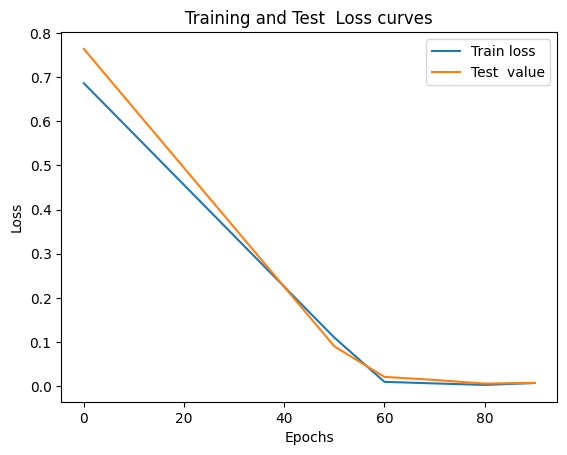

In [68]:
#plot the loss curve
plt.plot(epochs_count ,loss_values,label="Train loss" )
plt.plot(epochs_count , test_loss_values ,label="Test  value" )
plt.title("Training and Test  Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();





In [69]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [70]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [71]:
weight,bias

(0.7, 0.3)

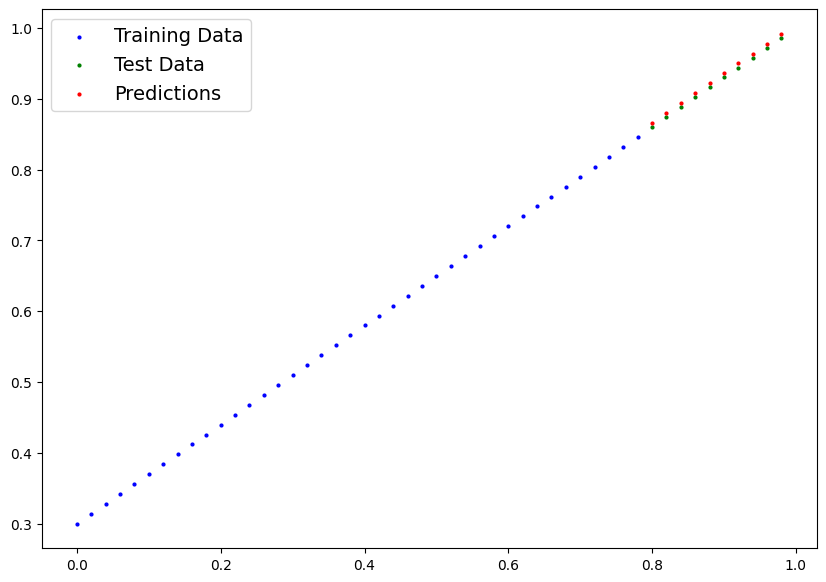

In [72]:
plot_predictions(predictions=y_preds_new)

In [73]:
model_0

LinearRegressionModel()

## saving a model in PyTorch

There are three amain methods you shoud know about saving and loading in Putorch

1. `torch.save()`--allows you save a pytorch Object in python pickle formate
2. `torch.load()` allows you to load a saved pytorch object  
3. `torch.nn.module.load_state_dict()` --this allows to load a model state dictonaries

PyTorch save and load code

In [74]:
#saving our PyTorch model
from pathlib import Path
 #1. Create model dierectory
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path
MODEL_NAME="Pytorch_Workflow_class_01.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#savr the model state_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
                         f=MODEL_SAVE_PATH)


Saving model to : Models/Pytorch_Workflow_class_01.pth


In [75]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1668 Mar  6 17:03 Pytorch_Workflow_class_01.pth


#Loading the pytorch Model

Since we saved our model state_dict() rather han loading the netire model.we'll cerate a new instance and load our model into that

In [76]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [77]:
#To  load ain a state_dict we have to inisiate a enew instance of our model calss
Loaded_model_0 = LinearRegressionModel()

#load the saved State_dict  of model )(this will update the new instances with updated parameters)
Loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-77-9de640a9c8c5>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [78]:
Loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [79]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [80]:
# make some predictions with our loaded model
Loaded_model_0.eval()
with torch.inference_mode():
  Loaded_model_preds=Loaded_model_0(X_test)

Loaded_model_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [85]:
#compare loaded model preds with original model preds
y_preds_new == Loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [83]:
y_preds_new

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])